time_series_visualizer:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns




Cargar y limpiar los datos:

In [ ]:
df = pd.read_csv("fcc-forum-pageviews.csv", index_col="date", parse_dates=True)

Limpiar los datos (filtrar el 2.5% superior e inferior):

In [ ]:
df = df[
    (df['value'] >= df['value'].quantile(0.025)) &
    (df['value'] <= df['value'].quantile(0.975))]

Función para dibujar el gráfico de líneas:

In [ ]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(df.index, df['value'], color='red', linewidth=1)

     # Título y etiquetas
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')

    return fig

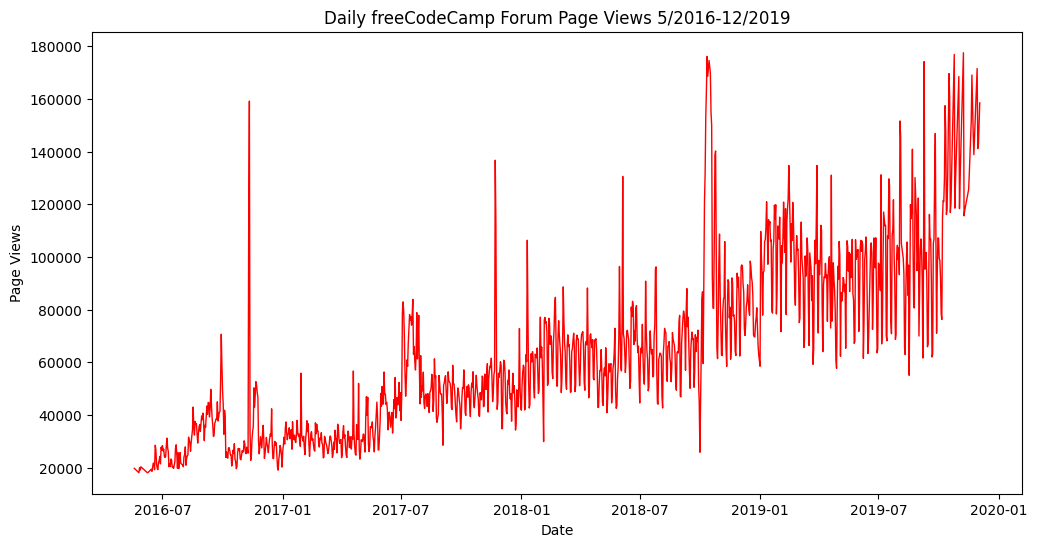

In [ ]:
fig = draw_line_plot()

Guardar figura:

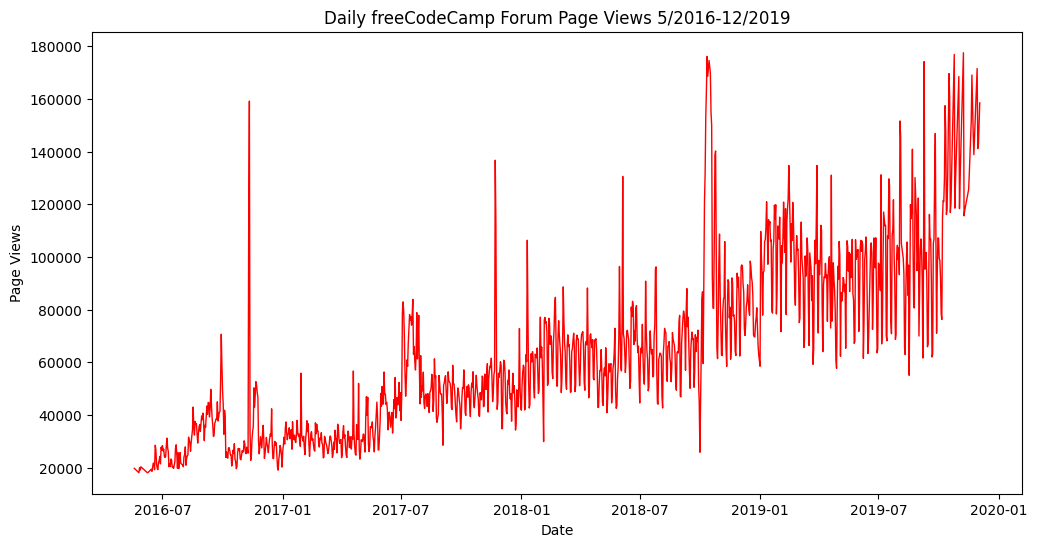

In [ ]:
fig.savefig('line_plot.png')
fig

Función para dibujar el gráfico de barras:

In [ ]:
def draw_bar_plot():

   # Copiar y preparar datos para el gráfico de barras
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()

    # Agrupar datos por año y mes, calcular el promedio
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    # Crear el gráfico de barras
    fig = df_bar.plot(kind='bar', figsize=(12, 8), legend=True ).figure
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.xticks(rotation=45)
    plt.legend(title='Months')

    # Guardar la figura en un archivo
    fig.savefig('bar_plot.png')
    fig

    return df_bar



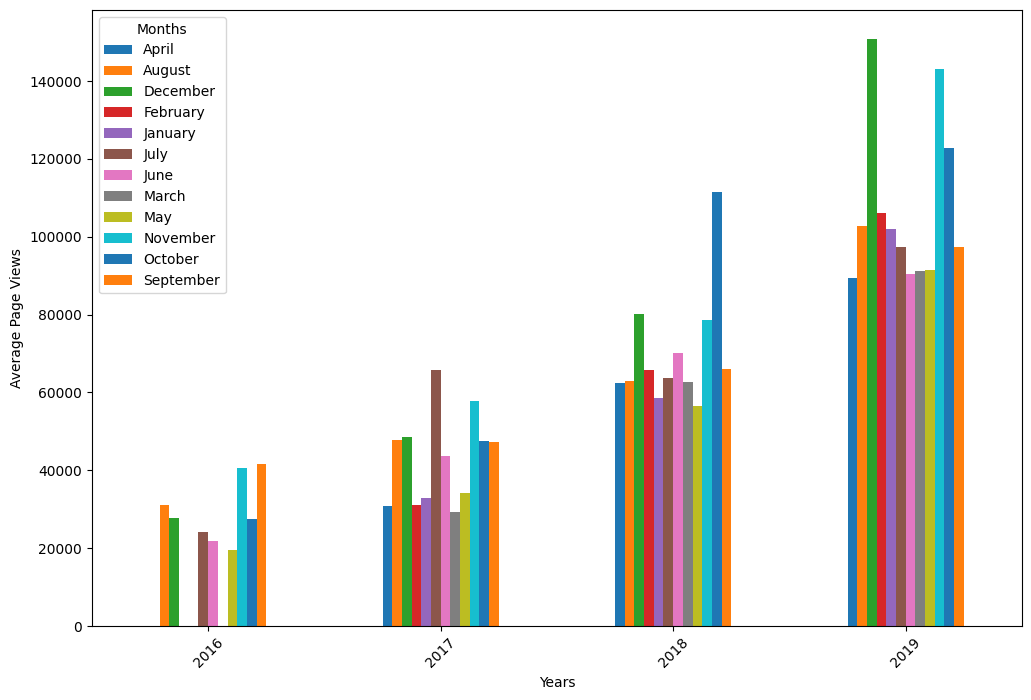

In [ ]:
df_bar = draw_bar_plot()


Función para dibujar los diagramas de caja

In [ ]:
def draw_box_plot():
  # Copiar y pegar los datos para los diagramas de caja
  df_box = df.copy()
  df_box.reset_index(inplace=True)
  df_box['year'] = df_box['date'].dt.year
  df_box['month'] = df_box['date'].dt.strftime('%b')

  # ordenar los meses de enero a diciembre
  df_box['month'] = pd.Categorical(df_box['month'], categories=[
      'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)

  # Crear los diagramas de caja
  fig, axes = plt.subplots(1, 2, figsize=(16, 6))
  sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
  axes[0].set_title('Year-wise Box Plot (Trend)')
  axes[0].set_xlabel('Year')
  axes[0].set_ylabel('Page Views')

  sns.boxplot(x='month', y='value', data=df_box, ax=axes[1])
  axes[1].set_title('Month-wise Box Plot (Seasonality)')
  axes[1].set_xlabel('Month')
  axes[1].set_ylabel('Page Views')

  # Guardar la figura en un archivo
  fig.savefig('box_plot.png')
  fig

  return fig


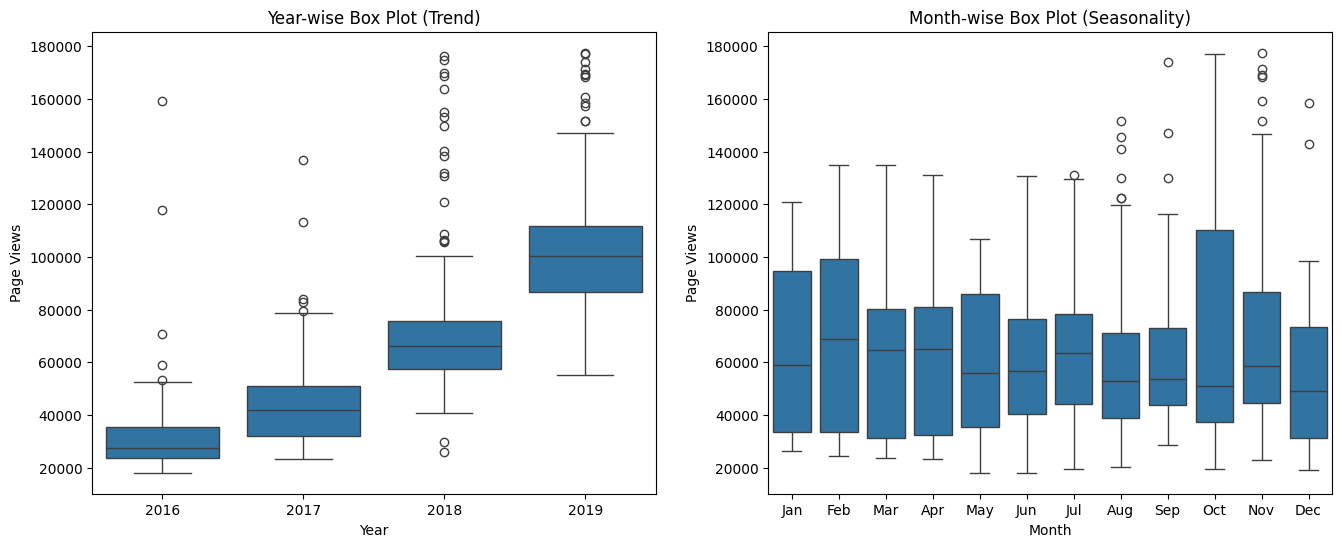

In [ ]:
df_box = draw_box_plot()
#